In [1]:
import math
import h5py
import numpy as np
from setutil import Ktp as K

h5File=h5py.File('h5-2k.h5','r')
frames=datasets=h5File['/frames']
ds_keys=list(datasets.keys())
ds_keys.sort(key=int)
last_frame=ds_keys[-1]
print(f'last frame {last_frame}')
print(f'1st record in frame #{last_frame} \n{frames[last_frame][0]}')

last frame 28500
1st record in frame #28500 
[-7.86978669e-04 -2.07064972e-04  5.34979100e-04  3.50618536e-04
 -1.42029989e-02  8.19195632e-04  2.02500222e+02  1.00000000e+00
  3.14525000e+02  1.00000000e+00]


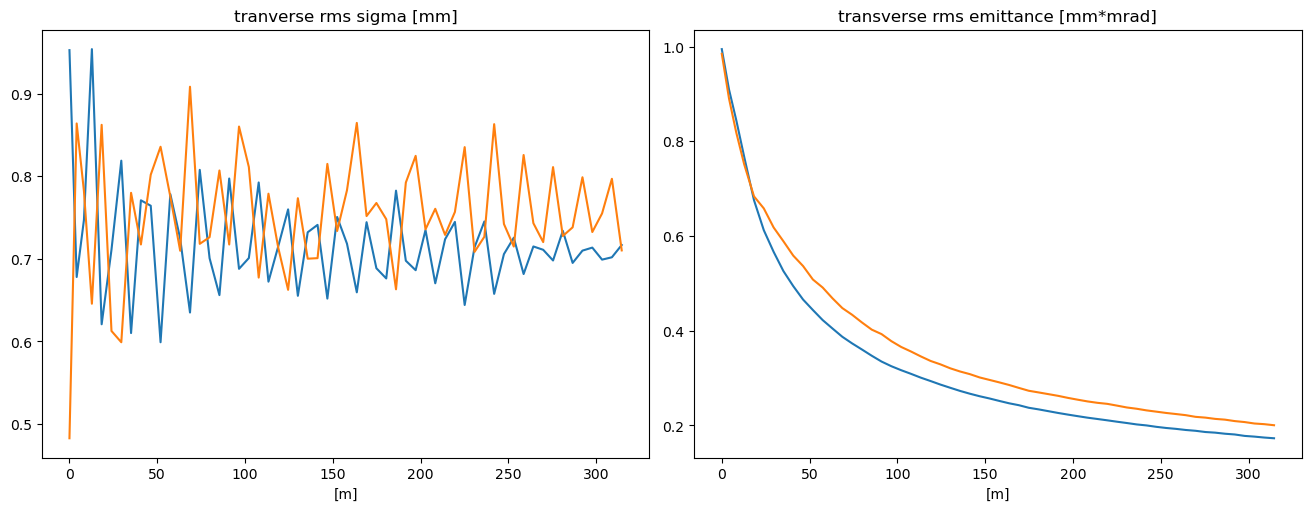

In [2]:
import matplotlib.pyplot as plt

def plt_beam_transverse(frames,ds_keys,ko):
    sigma     = []
    sigmap    = []
    emittance = []
    abscisse  = []
    (v1,v2)   = ko   # the 2 variables to correlate, f.i. (x,xp) or (y,yp)
    for f_cnt,frame_key in enumerate(ds_keys):
        # dataset is 2D array: row=particle index column=track point
        # track point is 1D array: [x,x',...,S,1] of length 10
        dataset=frames[frame_key]
        abscisse.append(dataset[0,K.S])
        # get 2 coordinate sets from dataset
        all_x = [i[v1] for i in dataset]
        all_xp= [i[v2] for i in dataset]
        # calculate covarince matrix between those 2 coordinates
        cxxp=np.cov(np.array([all_x,all_xp]))
        # get sigmas and emittance for covariance matrix
        sig  = math.sqrt(cxxp[0,0])
        sigp = math.sqrt(cxxp[1,1])
        emit = math.sqrt(np.linalg.det(cxxp))
    #     print(f'{f_cnt} sigx{sig}, sigp={sigp}, emitx={emit}')
        sigma.append(sig)
        sigmap.append(sigp)
        emittance.append(emit)
    return (abscisse,sigma,sigmap,emittance)

# prepare data
abscisse, sigmax, sigmaxp, emittx = plt_beam_transverse(frames,ds_keys,(K.x,K.xp))
abscisse, sigmay, sigmayp, emitty = plt_beam_transverse(frames,ds_keys,(K.y,K.yp))

# scale variables
sigmax  = [i*1e3 for i in sigmax]
sigmaxp = [i*1e3 for i in sigmaxp]
sigmay  = [i*1e3 for i in sigmay]
sigmayp = [i*1e3 for i in sigmayp]
emittx  = [i*1e6 for i in emittx]
emitty  = [i*1e6 for i in emitty]

# setup plots
plt.rcParams['figure.figsize'] = [13, 5]
fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].set_title('tranverse rms sigma [mm]')
ax[0].set_xlabel('[m]')
ax[0].plot(abscisse,sigmax)
ax[0].plot(abscisse,sigmay)
ax[1].set_title('transverse rms emittance [mm*mrad]')
ax[1].set_xlabel('[m]')
ax[1].plot(abscisse,emittx)
ax[1].plot(abscisse,emitty)
plt.show()

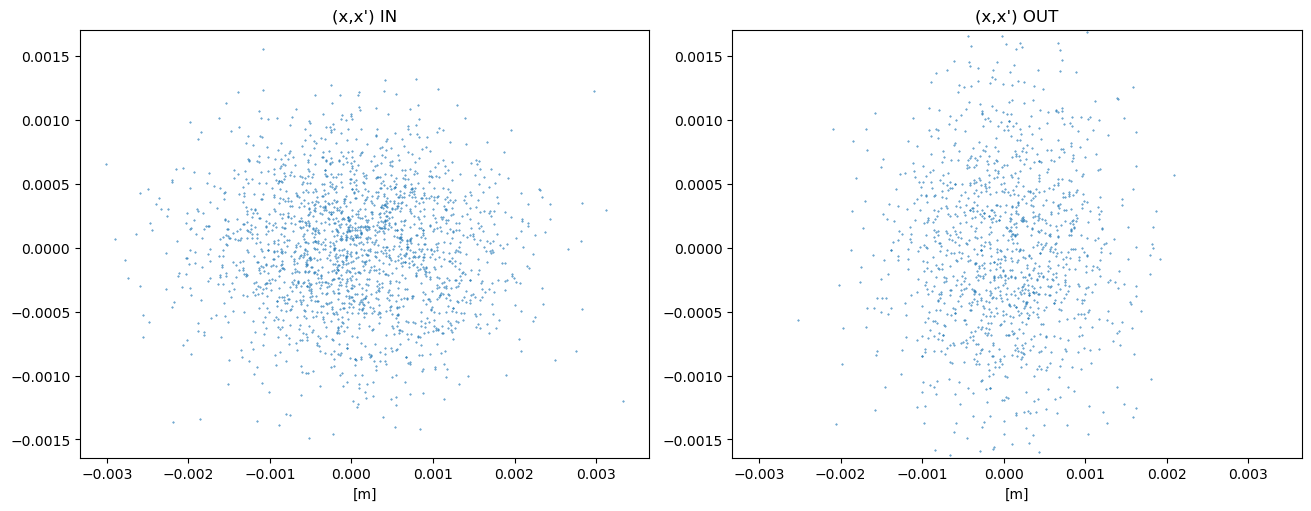

In [3]:
#%matplotlib inline
# first & last frame
InOutFrames = (frames[ds_keys[0]],frames[last_frame])

# figure & axis
plt.rcParams['figure.figsize'] = [13, 5]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2,constrained_layout=True)
#fig,axs = plt.subplots(1,2)
title = ('(x,x\') IN','(x,x\') OUT')
xlim = [0,0]
ylim = [0,0]

# read data sets from h5 file, make scatter plots
for cnt,frame in enumerate(InOutFrames):
    absc = []  # abscisse
    ordi = []  # ordinate
    for cnt1,particle in enumerate(frame):
        xk=particle[K.x]  # x Koordinate
        yk=particle[K.y]  # y Koordinate
        absc.append(xk)
        ordi.append(yk)
    # scatter plots
    ax[cnt].plot(absc,ordi,'.',ms=0.8)    # ax[cnt].scatter(absc,ordi,s=2)
#    ax[cnt].figure.set_size_inches(10.,3.3)
    ax[cnt].set_title(title[cnt])
    ax[cnt].set_xlabel('[m]')
    xlim[cnt] = ax[cnt].get_xlim()
    ylim[cnt] = ax[cnt].get_ylim()
    if cnt > 0:
        ax[cnt].set_xlim(xlim[0])
        ax[cnt].set_ylim(ylim[0])
plt.show()

In [4]:
h5File.close()